In [ ]:
!pip install torchmetrics==0.8.2
!pip install wandb
!pip install split-folders

In [ ]:
from google.colab import drive
#to mount drive contents to colab
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%%writefile run_config.py
import argparse
import datetime

parser = argparse.ArgumentParser(description='Select Action ')
parser.add_argument('--model', default=False, help='Select model')
parser.add_argument('--epoch', type=int, default=15, help='Set number of epochs')
parser.add_argument('--dataset_name', default="SUN", help='Select dataset: SUN for SUN colonoscopy video database, CDS_WLI for colonoscopicDS dataset')
args = parser.parse_args()
model_type = args.model
model_name = model_type+"_e"+str(args.epoch)+"_"+str(datetime.datetime.now())
batch_size = 8
config = {
                "dataset" : args.dataset_name,
                "img_path" : f"/tmp/images_{args.dataset_name}_trainvalaug_spectral_reflect/",
                "output_path":"/tmp/save"+"_"+model_name+"/",
                "model_name":model_name,
                "model" : model_type,
                "lr":3e-4,
                "w_d":1e-5,
                "batch_size":batch_size,
                "epoch":args.epoch,
                "init": "he",
                "loss":"bce"
            }

Overwriting run_config.py


In [ ]:
%run -i run_config.py --model ssa --epoch 1 --dataset_name CDS_WLI

In [ ]:
import zipfile
import os

#extract images.zip to images folder inside tmp
zip_ref = zipfile.ZipFile(f'/content/gdrive/MyDrive/thesis/images_{config["dataset"]}_trainvalaug_spectral_reflect.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
len(os.listdir(f'/tmp/images_{config["dataset"]}_trainvalaug_spectral_reflect/'))

1147

# **PreProcessing Code**

In [ ]:
import zipfile
import os

#extract images.zip to images folder inside tmp
zip_ref = zipfile.ZipFile(f'/content/gdrive/MyDrive/thesis/{config["dataset"]}.zip', 'r') #Opens the zip file in read mode
#zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/thesis/images_CDS_WLI_final11_tranivalaug_spectral_reflect11.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
""""
This will remove specular reflections from image and save it to new folder specular_removed
"""
import os
import cv2
import numpy as np

def show_img(img,name):
    window_name=name
    cv2.imshow(window_name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def inpaint(img_path,op_folder):
    # Open the image file
    image = cv2.imread(img_path)

    # Convert the image to the HSV color space
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # show_img(image_hsv,"HSV_image")
    # Split the HSV image into individual channels
    h, s, v = cv2.split(image_hsv)
    # show_img(h,"H")
    # show_img(s,"S")
    # show_img(v,"V")
    # Define the threshold for saturation
    saturation_threshold = 15 #intial 50

    # Create a mask for low saturated areas
    low_saturation_mask = s<saturation_threshold
    low_saturation_mask = low_saturation_mask.astype(np.uint8) * 255
    # print(low_saturation_mask.shape)
    # show_img(low_saturation_mask,"low_saturation_mask")
    # print(cv2.cvtColor(low_saturation_mask, None))

    # contours, _ = cv2.findContours(low_saturation_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    low_saturation_mask2 = cv2.dilate(low_saturation_mask, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11)),iterations=2)
    # show_img(low_saturation_mask2,"dilate")
    # low_saturation_mask2 = cv2.erode(low_saturation_mask2,(5,5),iterations = 2)
    # show_img(low_saturation_mask2,"erode")

    # Perform inpainting to fill low saturation areas
    inpaint_image = cv2.inpaint(image, low_saturation_mask2,4, cv2.INPAINT_NS)
    # show_img(inpaint_image,"inpaint_image")

    # Convert the inpainted image array back to PIL image
    # inpaint_image_pil = Image.fromarray(cv2.cvtColor(inpaint_image, cv2.COLOR_BGR2RGB))

    # # Display the resulting image
    # show_image(inpaint_image_pil)
    op_image_name=os.path.join(op_folder,os.path.basename(img_path))
    print(op_image_name)
    cv2.imwrite(op_image_name,inpaint_image)

#This function will iterate over the folders
def specular_remove(folder_path, output_folder_path):
    for direc in os.listdir(folder_path):
        direc_1 = os.path.join(folder_path,direc)
        op_folder = os.path.join(output_folder_path,direc)
        print("op_folder",op_folder)
        if not os.path.exists(op_folder):
            os.makedirs(op_folder)
        for img in os.listdir(direc_1):
            img_path = os.path.join(direc_1,img)
            inpaint(img_path,op_folder)

if __name__ == "__main__":
    output_folder = os.path.join(f'/tmp/specular_removed_{config["dataset"]}')

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)


    specular_remove(f'/tmp/{config["dataset"]}',output_folder)

op_folder /tmp/specular_removed_CDS_WLI/benign
/tmp/specular_removed_CDS_WLI/benign/h_07.png
/tmp/specular_removed_CDS_WLI/benign/h_04.png
/tmp/specular_removed_CDS_WLI/benign/h_19.png
/tmp/specular_removed_CDS_WLI/benign/h_01.png
/tmp/specular_removed_CDS_WLI/benign/h_16.png
/tmp/specular_removed_CDS_WLI/benign/h_18.png
/tmp/specular_removed_CDS_WLI/benign/h_03.png
/tmp/specular_removed_CDS_WLI/benign/h_08.png
/tmp/specular_removed_CDS_WLI/benign/h_13.png
/tmp/specular_removed_CDS_WLI/benign/h_20.png
/tmp/specular_removed_CDS_WLI/benign/h_17.png
/tmp/specular_removed_CDS_WLI/benign/h_14.png
/tmp/specular_removed_CDS_WLI/benign/h_05.png
/tmp/specular_removed_CDS_WLI/benign/h_21.png
/tmp/specular_removed_CDS_WLI/benign/h_02.png
op_folder /tmp/specular_removed_CDS_WLI/malignant
/tmp/specular_removed_CDS_WLI/malignant/a_32.png
/tmp/specular_removed_CDS_WLI/malignant/a_33.png
/tmp/specular_removed_CDS_WLI/malignant/a_29.png
/tmp/specular_removed_CDS_WLI/malignant/a_05.png
/tmp/specular_rem

In [ ]:
""" This code will split the images into train, test and validation sets"""
import splitfolders
output_folder = f'/tmp/colon_split{config["dataset"]}'
splitfolders.ratio(f'/tmp/{config["dataset"]}', output=output_folder, seed=12, ratio=(0.7, 0.1,0.2))

Copying files: 40 files [00:00, 1160.09 files/s]


In [ ]:
"""This will augment the train and validatiom set with more data"""
from keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.utils import img_to_array, load_img

count_dict = {"SUN_malignant":7,
              "SUN_benign":2 ,
              "CDS_WLI_malignant":25,
              "CDS_WLI_benign":45}
datagen = ImageDataGenerator(
        rotation_range=10,
        # width_shift_range=0.2,
        # height_shift_range=0.2,
        shear_range=0.01,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='reflect')

path = f'/tmp/colon_split{config["dataset"]}'
for folder in os.listdir(path):
  print(folder)
  if folder in ["test"]:
      continue

  folder_path = os.path.join(path,folder)
  for type_folder in os.listdir(folder_path):
      type_folder_path = os.path.join(folder_path,type_folder)
      for im in os.listdir(type_folder_path):
        img = load_img(os.path.join(type_folder_path,im))  # this is a PIL image
        x = img_to_array(img)  # this is a Numpy array with shape (3, 512, 512)
        x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 512, 512)
        i = 0
        # Generate and save 20 augmented images for each original image
        print(f'{os.path.splitext(im)[0]}_aug{i}')
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=type_folder_path, save_prefix=f'{os.path.splitext(im)[0]}_aug{i}', save_format='jpg'):
            i += 1
            if i >=count_dict[config["dataset"]+"_"+type_folder]:
                break

      #for sun dataset train+val benign = 1314 i =2
      # malignant = 505  so i =7

      #for sun with adenoma and hyperplastic , i=2 for benign as h= 1314 and malignant = 3288
      #for kumc i =1

      #for nbi i=32 for benign, i=20 for malignant
      # for wli i=45 for benign and i=25 for malignant

train
h_02_aug0_0_2268_aug0
h_07_aug0_0_5519_aug0
h_04_aug0_0_1392_aug0
h_01_aug0_0_4139_aug0
h_02_aug0_0_2636_aug0
h_07_aug0
h_21_aug0_0_4638_aug0
h_07_aug0_0_3449_aug0
h_02_aug0_0_7_aug0
h_04_aug0
h_20_aug0_0_7074_aug0
h_08_aug0_0_7858_aug0
h_21_aug0_0_7759_aug0
h_16_aug0_0_7312_aug0
h_18_aug0_0_7428_aug0
h_03_aug0_0_7126_aug0
h_18_aug0_0_2720_aug0
h_16_aug0_0_7073_aug0
h_18_aug0_0_2572_aug0
h_01_aug0
h_02_aug0_0_733_aug0
h_16_aug0_0_2563_aug0
h_20_aug0_0_4465_aug0
h_01_aug0_0_1770_aug0
h_16_aug0
h_18_aug0
h_08_aug0_0_117_aug0
h_03_aug0
h_01_aug0_0_5441_aug0
h_07_aug0_0_6802_aug0
h_01_aug0_0_6065_aug0
h_08_aug0
h_07_aug0_0_7538_aug0
h_21_aug0_0_5032_aug0
h_20_aug0
h_20_aug0_0_456_aug0
h_04_aug0_0_7807_aug0
h_03_aug0_0_5211_aug0
h_18_aug0_0_844_aug0
h_08_aug0_0_9465_aug0
h_20_aug0_0_8056_aug0
h_16_aug0_0_1910_aug0
h_21_aug0_0_4958_aug0
h_21_aug0
h_03_aug0_0_4250_aug0
h_08_aug0_0_404_aug0
h_04_aug0_0_9550_aug0
h_04_aug0_0_9801_aug0
h_02_aug0
h_03_aug0_0_8139_aug0
a_32_aug0
a_29_aug0_0_

In [ ]:
"""This will generate data_split.json file containing dictionary of train, test, valid split split images. The labels of these images will
be present in labels.json file"""
import os
import json
labels={}
data_split= {}

dataset_path = f'/tmp/colon_split{config["dataset"]}'
for folder1 in os.listdir(dataset_path):
    folder2_path = os.path.join(dataset_path,folder1)
    temp=[]
    for folder2 in os.listdir(folder2_path):
        for img in os.listdir(os.path.join(folder2_path,folder2)):
            # print(folder1,folder2,img)
            labels[f"{img}"] = [f"{folder2}"]
            temp.append(img)
    data_split[f"{folder1}"] = temp
    print(f"len_{folder1}",len(temp))

# print(labels)
json_obj = json.dumps(labels)
with open(f"/tmp/labels_colon_trainvalaugmented_{config['dataset']}.json","w") as f:
    f.write(json_obj)
print("Done with creating label json")
json_obj1 = json.dumps(data_split,indent =2 )
with open(f"/tmp/data_split_colon_trainvalaugmented_{config['dataset']}.json","w") as f:
    f.write(json_obj1)
# len_test 9834
# len_train 34391
# len_val 4911

len_train 3619
len_val 386
len_test 10
Done with creating label json


In [ ]:
"""
This file is used to move images from colon_split to images folder
create destination folder
"""
import os
import shutil

dataset_path =f'/tmp/colon_split{config["dataset"]}'
dest_path = f'/tmp/images_{config["dataset"]}_trainvalaug_spectral_reflect/'
if not os.path.isdir(dest_path):
    os.makedirs(dest_path)
for folder1 in os.listdir(dataset_path):
    folder2_path = os.path.join(dataset_path,folder1)
    for folder2 in os.listdir(folder2_path):
        img_path = os.path.join(folder2_path,folder2)
        print(img_path)
        for img in os.listdir(img_path):
            print(folder1,folder2,img)
            shutil.copy(os.path.join(img_path,img),dest_path)

/tmp/colon_splitCDS_WLI/train/benign
train benign h_01_aug0_0_5926.jpg
train benign h_21_aug0_0_464.jpg
train benign h_20_aug0_0_4465_aug0_0_9391.jpg
train benign h_16_aug0_0_1910_aug0_0_8210.jpg
train benign h_04_aug0_0_7807_aug0_0_9899.jpg
train benign h_04_aug0_0_9801_aug0_0_3149.jpg
train benign h_08_aug0_0_7858_aug0_0_2788.jpg
train benign h_21_aug0_0_4958_aug0_0_2067.jpg
train benign h_18_aug0_0_7428_aug0_0_1419.jpg
train benign h_16_aug0_0_7312_aug0_0_5855.jpg
train benign h_07_aug0_0_7538_aug0_0_2866.jpg
train benign h_21_aug0_0_5032_aug0_0_7327.jpg
train benign h_01_aug0_0_1770_aug0_0_3113.jpg
train benign h_20_aug0_0_2223.jpg
train benign h_20_aug0_0_939.jpg
train benign h_02_aug0_0_733_aug0_0_3147.jpg
train benign h_04_aug0_0_9641.jpg
train benign h_21_aug0_0_4958_aug0_0_2262.jpg
train benign h_18_aug0_0_844_aug0_0_6636.jpg
train benign h_01_aug0_0_1664.jpg
train benign h_16_aug0_0_2563_aug0_0_4061.jpg
train benign h_04_aug0_0_7807_aug0_0_5913.jpg
train benign h_07_aug0_0_75

In [ ]:
""" This code will provide the mean and standard deviation of the dataset"""
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor, Grayscale, Resize

dataset = ImageFolder(f'/tmp/colon_split{config["dataset"]}', transform=ToTensor())

# Convert images to grayscale
dataset.transform = transforms.Compose([
    Resize([512,512]),
    Grayscale(num_output_channels=1),
    ToTensor()
])

loader = torch.utils.data.DataLoader(dataset, batch_size=32)

mean = 0.
std = 0.
num_samples = 0.
for images, _ in loader:
    #images variable contains a tensor of shape (batch_size, num_channels, height, width)
    batch_size = images.size(0)
    # Flatten images to 2D tensor (batch_size, num_pixels)
    images = images.view(batch_size, -1)
    mean += images.mean(1).sum(0)
    std += images.std(1).sum(0)
    num_samples += batch_size

mean /= num_samples
std /= num_samples

print('Mean:', mean)
print('Std:', std)


Mean: tensor(0.3030)
Std: tensor(0.2362)


# **Training and Testing**

In [ ]:
########################################################DATAPREPROCESSOR.PY################################################################################
%%writefile datapreprocessor.py

import torch
import numpy as np
import os
from torch.utils import data
from torchvision import transforms
from PIL import Image, ImageOps

class DataPreProcess(data.Dataset):
    def __init__(self, image_path, file_list, label_json):

        self.image_path = image_path
        self.files = file_list
        self.label_json = label_json
        self.transform = transforms.Compose([
            transforms.Resize([512,512]),
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor(),
            transforms.Normalize((0.3901, ),(0.1942,) )]
        )
        #transforms.Normalize(0.3901,0.1942) for sun dataset
        #transforms.Normalize(0.2627,0.2455) for colonoscopicds
        #transforms.Normalize(0.4116,0.2636) for kumc

    def __len__(self):
        return len(self.files)

    def __getitem__(self, index):

        file_name = self.files[index]
        self.image_path=self.image_path.split("\\")[-1]
        img = Image.open(os.path.join(self.image_path , file_name),mode="r")
        #img = ImageOps.grayscale(img)
        #print(img)
        label_list = self.label_json[file_name]
        val = 0
        for label in label_list:
            if label == 'benign':
                val = 1
            elif label == 'malignant':
                val = 0
        #print("label_list", label_list)
        label_final = [val]
        label_array = np.array(label_final)
        label_tensor = torch.FloatTensor(label_array)
        #print(f"label_tensor: {label_tensor}, label_tensor_shape: {label_tensor.shape}")
        img = self.transform(img)
        img = img.type(torch.FloatTensor)
        #print("label_tensor.shape",label_tensor.shape)
        return img, label_tensor


Writing datapreprocessor.py


In [ ]:
#########################################################MODEL.PY####################################################################################
%%writefile model.py
import numpy as np

import torch
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import matplotlib.pyplot as plt

class AttentionConvolve(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, groups=1, bias=False):
        super(AttentionConvolve, self).__init__()
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.groups = groups

        assert self.out_channels % self.groups == 0, "out_channels should be divided by groups. (example: out_channels: 40, groups: 4)"

        self.rel_h = nn.Parameter(torch.randn(out_channels // 2, 1, 1, kernel_size, 1), requires_grad=True)
        self.rel_w = nn.Parameter(torch.randn(out_channels // 2, 1, 1, 1, kernel_size), requires_grad=True)

        self.key_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=bias)
        self.query_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=bias)
        self.value_conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=bias)

        self.reset_parameters()

    def forward(self, x):
        #print("ssa init forward")
        batch, channels, height, width = x.size()

        padded_x = F.pad(x, [self.padding, self.padding, self.padding, self.padding])
        q_out = self.query_conv(x)
        k_out = self.key_conv(padded_x)
        v_out = self.value_conv(padded_x)

        k_out = k_out.unfold(2, self.kernel_size, self.stride).unfold(3, self.kernel_size, self.stride)
        v_out = v_out.unfold(2, self.kernel_size, self.stride).unfold(3, self.kernel_size, self.stride)

        k_out_h, k_out_w = k_out.split(self.out_channels // 2, dim=1)
        k_out = torch.cat((k_out_h + self.rel_h, k_out_w + self.rel_w), dim=1)

        k_out = k_out.contiguous().view(batch, self.groups, height, width, -1, self.out_channels // self.groups)
        v_out = v_out.contiguous().view(batch, self.groups, height, width, -1, self.out_channels // self.groups)

        q_out = q_out.contiguous().view(batch, self.groups, height, width, 1, self.out_channels // self.groups)

        out = torch.matmul(q_out, (k_out).transpose(-1, -2))
        out = F.softmax(out, dim=-1)

        out = torch.matmul(out, v_out).view(batch, -1, height, width)
        return out

    def reset_parameters(self):
        init.kaiming_normal_(self.key_conv.weight, mode='fan_out', nonlinearity='relu')
        init.kaiming_normal_(self.value_conv.weight, mode='fan_out', nonlinearity='relu')
        init.kaiming_normal_(self.query_conv.weight, mode='fan_out', nonlinearity='relu')

        init.normal_(self.rel_h, 0, 1)
        init.normal_(self.rel_w, 0, 1)



class AttentionNetwork(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(AttentionNetwork, self).__init__()

        self.layer1 = nn.Sequential(
            AttentionConvolve(1, 16, kernel_size=3, padding = 1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = nn.Sequential(
            AttentionConvolve(16, 32, kernel_size=3, padding = 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            AttentionConvolve(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer4 = nn.Sequential(
            AttentionConvolve(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer5 = nn.Sequential(
            AttentionConvolve(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = nn.Sequential(
            nn.Linear(64 * 16 * 16, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, 1))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        #print("###################################################ndim",x.ndim)
        #print("###################################################shape",x.shape)
        #print("###################################################size",x.size())
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


Writing model.py


In [ ]:
#########################################################MODEL.PY####################################################################################
%%writefile model_cnn.py
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(CNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer4 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer5 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))


        self.fc = nn.Sequential(
            nn.Linear(64 * 16 *16, 1024),
            nn.ReLU(),
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes))

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        #x = self.layer6(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


Writing model_cnn.py


**Model Extraction Code**

In [ ]:
# zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/thesis/19_may_2023_ssa_30epoch_int_he_withoutLayers_13579_aug_spectral_reflect.zip', 'r') #Opens the zip file in read mode
# zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
# zip_ref.close()

In [ ]:
########################################################TRAIN.PY#####################################################################################
%%writefile train.py

import os
import json
import random
import wandb
import numpy as np

import torch
from torch import optim
from torch import nn
from torch.utils import data
from torch.nn import functional as F
from torchvision import models
from torchvision import transforms
import torchmetrics
from torchmetrics import AUROC, F1Score, Precision, Recall, ConfusionMatrix
from datapreprocessor import DataPreProcess
from model import AttentionNetwork
from model_cnn import CNN
from tqdm import tqdm as tq
import matplotlib.pyplot as plt

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

def seed_val(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)

def init_weights_he(m):
    if type(m) == nn.Conv2d:
        nn.init.kaiming_uniform_(m.weight)
    if type(m) == nn.Linear:
        nn.init.kaiming_uniform_(m.weight)


def train(config):
    img_path = config['img_path']
    print(img_path)
    output_path = config['output_path']
    if not os.path.isdir(output_path):
        os.makedirs(output_path)

    if os.path.exists("/tmp/data_split_colon_trainvalaugmented_{config['dataset']}.json"):
        data_file = f"/tmp/data_split_colon_trainvalaugmented_{config['dataset']}.json"
    else:
        data_file = f"/content/gdrive/MyDrive/thesis/data_split_colon_trainvalaugmented_{config['dataset']}.json"

    if os.path.exists("/tmp/labels_colon_trainvalaugmented_{config['dataset']}.json"):
        label_file = f"/tmp/labels_colon_trainvalaugmented_{config['dataset']}.json"
    else:
        label_file = f"/content/gdrive/MyDrive/thesis/labels_colon_trainvalaugmented_{config['dataset']}.json"

    with open(os.path.join("content",data_file),"r") as f1:
        split_data = json.load(f1)

    with open(os.path.join("content",label_file),"r") as f2:
        label_json = json.load(f2)

    train_list = [file for file in split_data['train']]
    val_list = [file for file in split_data['val']]
    #print(train_list)
    #print(val_list)
    train_dataset = DataPreProcess(image_path=img_path, label_json = label_json, file_list = train_list)
    validation_dataset = DataPreProcess(image_path=img_path, file_list = val_list, label_json = label_json)
    train_data_loader = data.DataLoader(
                                train_dataset, batch_size=config['batch_size'], shuffle=True,
                                num_workers=10, pin_memory=True,
                                worker_init_fn=seed_val)
    validation_data_loader = data.DataLoader(
                                validation_dataset, batch_size=config['batch_size'], shuffle=False,
                                num_workers=10, pin_memory=True,
                                worker_init_fn=seed_val)

    if config['model'] == 'ssa':
        print("Model : SELF ATTENTION")
        model = AttentionNetwork(in_channels=1, num_classes=1)
    elif config['model'] == 'cnn':
        print("Model : CNN")
        model = CNN(in_channels=1, num_classes=1)
    else:
        print("Model : RESNET50")
        model = models.resnet50(pretrained=False)
        model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features, 1)

    use_gpu = torch.cuda.is_available()
    if use_gpu:
        model = model.cuda()
    if config['init']=='he':
        model = model.apply(init_weights_he)

    print("Loss criterion is BCE")
    loss_criteria = nn.BCEWithLogitsLoss()

    optimizer = optim.Adam(model.parameters(), lr=config['lr'], weight_decay=config['w_d'])
    # Use below class weights if unbalanced.
    #class_weights = torch.tensor([0.6922, 1.8007]).cuda() #-for sun
    #class_weights = torch.tensor([0.9574, 1.0464]).cuda() #- for kumc
    #class_weights = torch.tensor([1.4523, 0.7625]).cuda() #for ColonoscopicDS
    class_weights = torch.tensor([1.0, 1.0]).cuda()

    epochs = config['epoch']
    for epoch in range(epochs):
        print(f'Epoch: {epoch}')
        num_training_batches = 0
        num_validation_batches = 0
        train_running_loss = 0
        valid_running_loss = 0


        mean_cm_train = torchmetrics.ConfusionMatrix(num_classes=2)

        model.train(True)

        for datasample in tq(train_data_loader):
            img, label = datasample
            if use_gpu:
                img = img.cuda()
                label = label.cuda()

            out_probability = model(img)
            model_out = F.sigmoid(out_probability)
            model_out[model_out > 0.6] = 1
            model_out[model_out <= 0.6] = 0

            loss = loss_criteria(out_probability, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_running_loss += loss.item()

            instance_out = model_out
            instance_in = label
            mean_cm_train.update(instance_out.cpu(), instance_in.int().cpu())
            num_training_batches += 1

        train_loss_mean = train_running_loss/num_training_batches

        mean_train = mean_cm_train.compute().numpy()
        print('=====================================Confusion Matrix - Training =====================================:')
        print(mean_train)

        true_positive_train = mean_train[0, 0]
        false_positive_train = mean_train[1, 0]
        true_negative_train = mean_train[1, 1]
        false_negative_train = mean_train[0, 1]

        train_accuracy = (true_positive_train + true_negative_train)/(true_positive_train + true_negative_train +false_positive_train+false_negative_train)
        train_precision = (true_positive_train)/(true_positive_train+false_positive_train)
        train_recall = (true_positive_train)/(true_positive_train+false_negative_train)
        train_f1_score = 2*((train_precision*train_recall)/(train_precision+train_recall))
        print(f'Epoch:{epoch}/{epochs} Accuracy:{train_accuracy}, Fscore:{train_f1_score}, Precison:{train_precision}, Recall:{train_recall}')


        model.eval()

        mean_cm_val = torchmetrics.ConfusionMatrix(num_classes=2)
        with torch.no_grad():
            for datasample in tq(validation_data_loader):
                img, label = datasample

                if use_gpu:
                    img = img.cuda()
                    label = label.cuda()

                out_probability = model(img)
                #print("label,out",label,out)
                model_out = F.sigmoid(out_probability)
                model_out[model_out > 0.6] = 1
                model_out[model_out <= 0.6] = 0
                loss = loss_criteria(out_probability, label)

                valid_running_loss += loss.item()

                instance_out = model_out
                instance_in = label
                mean_cm_val.update(instance_out.cpu(), instance_in.int().cpu())

                num_validation_batches += 1

            mean_val = mean_cm_val.compute().numpy()
            print('=====================================Confusion Matrix - Validation=====================================:')
            print(mean_val)

            valid_loss_mean = valid_running_loss/num_validation_batches

            true_positive_val = mean_val[0, 0]
            false_positive_val = mean_val[1, 0]
            true_negative_val = mean_val[1, 1]
            false_negative_val = mean_val[0, 1]

            val_accuracy = (true_positive_val + true_negative_val)/(true_positive_val + true_negative_val +false_positive_val+false_negative_val)
            val_precision = (true_positive_val)/(true_positive_val+false_positive_val)
            val_recall = (true_positive_val)/(true_positive_val+false_negative_val)
            val_f1_score = 2*((val_precision*val_recall)/(val_precision+val_recall))


            print(f'Epoch:{epoch}/{epochs} Accuracy:{val_accuracy}, Fscore:{val_f1_score}, Precision:{val_precision}, Recall:{val_recall}')

        saved_model = {'epoch': epoch, 'state_dict': model.state_dict(),
                    'optimizer': optimizer.state_dict(), 'acc':val_accuracy}
        torch.save(saved_model, output_path+'model_epoch'+str(epoch)+'.pt')

        log_dict_train_val = {
            'net_train_loss': train_loss_mean,
            'net_valid_loss': valid_loss_mean,
            'train_mean_acc' : train_accuracy,
            'valid_mean_acc': val_accuracy,
            'train_mean_fscore' : train_f1_score,
            'valid_mean_fscore': val_f1_score,
            'train_mean_precision' : train_precision,
            'valid_mean_precision': val_precision,
            'train_mean_recall' : train_recall,
            'valid_mean_recall': val_recall,
            'epoch':epoch
        }

        print(log_dict_train_val)
        log_dict_train_val_dump = json.dumps(log_dict_train_val)
        with open(output_path+f'results_{epoch}.json', 'w') as f1:
                f1.write(log_dict_train_val_dump)

        wandb.log(log_dict_train_val)


def test(config):
    epoch = config['epoch']
    img_path = config['img_path']
    output_path = config['output_path']
    if not os.path.isdir(output_path):
        os.makedirs(output_path)

    if os.path.exists("/tmp/data_split_colon_trainvalaugmented_{config['dataset']}.json"):
        data_file = f"/tmp/data_split_colon_trainvalaugmented_{config['dataset']}.json"
    else:
        data_file = f"/content/gdrive/MyDrive/thesis/data_split_colon_trainvalaugmented_{config['dataset']}.json"

    if os.path.exists("/tmp/labels_colon_trainvalaugmented_{config['dataset']}.json"):
        label_file = f"/tmp/labels_colon_trainvalaugmented_{config['dataset']}.json"
    else:
        label_file = f"/content/gdrive/MyDrive/thesis/labels_colon_trainvalaugmented_{config['dataset']}.json"

    with open(os.path.join("content",data_file),"r") as f1:
        split_data = json.load(f1)

    with open(os.path.join("content",label_file),"r") as f2:
        label_json = json.load(f2)


    test_list = [file for file in split_data['test'] ]

    test_dataset = DataPreProcess(image_path=img_path,
                                label_json = label_json,
                                file_list=test_list)

    test_data_loader = data.DataLoader(
                                test_dataset, batch_size=1, shuffle=False,
                                num_workers=10, pin_memory=True,
                                worker_init_fn=seed_val)

    if config['model'] == 'ssa':
        model = AttentionNetwork(in_channels=1, num_classes=1)
    elif config['model'] == 'cnn':
        model = CNN(in_channels=1, num_classes=1)
    elif config['model'] == 'resnet50':
        model = models.resnet50(pretrained=False)
        model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features, 1)

    use_gpu = torch.cuda.is_available()
    if use_gpu :
        model = model.cuda()

    print("Load path = ",output_path+'model_epoch'+str(epoch-1)+'.pt')
    checkpoint = torch.load(output_path+'model_epoch'+str(epoch-1)+'.pt')
    #checkpoint = torch.load("/tmp/16june/model_epoch78.pt")
    model.load_state_dict(checkpoint['state_dict'])

    test_batches = 0
    test_running_loss = 0

    class_weights = torch.tensor([1.0, 1.0]).cuda()
    loss_criteria = nn.BCEWithLogitsLoss()

    mean_cm_test = torchmetrics.ConfusionMatrix(num_classes=2)

    model.eval()
    with torch.no_grad():
        for datasample, img_name in tq(zip(test_data_loader, test_list)):
            #print("Image name:", img_name)
            img, label = datasample

            if use_gpu :
                img = img.cuda()
                label = label.cuda()

            out = model(img)
            net_out = F.sigmoid(out)
            net_out[net_out > 0.6] = 1
            net_out[net_out <= 0.6] = 0
            loss = loss_criteria(out, label)
            #print(f"Input label: {label}, net_out: {net_out}")
            test_running_loss += loss.item()

            instance_out = net_out
            instance_in = label
            mean_cm_test.update(instance_out.cpu(), instance_in.int().cpu())

            test_batches += 1

        mean_test = mean_cm_test.compute().numpy()
        print('=====================================Confusion Matrix - Testing =====================================:')
        print(mean_test)

        img_count = test_batches
        test_loss_mean = test_running_loss/img_count

        true_positive_test = mean_test[0, 0]
        false_positive_test = mean_test[1, 0]
        true_negative_test = mean_test[1, 1]
        false_negative_test = mean_test[0, 1]
        test_accuracy = (true_positive_test + true_negative_test)/(true_positive_test + true_negative_test +false_positive_test+false_negative_test)
        test_precision = (true_positive_test)/(true_positive_test+false_positive_test)
        test_recall = (true_positive_test)/(true_positive_test+false_negative_test)
        test_f1_score = 2*((test_precision*test_recall)/(test_precision+test_recall))

        print("true_positive,false_negative,false_positive,true_negative",true_positive_test,false_negative_test,false_positive_test,true_negative_test)
        print(f'TEST OUTPUT \n A_mean_accuracy: {test_accuracy}\n FScore: {test_f1_score}\n Precision:{test_precision} \n Recall:{test_recall}\n Loss: {test_loss_mean}\n Image Count: {img_count}')
        log_dict_tes = {
            'test_A_mean_accuracy': test_accuracy,
            'test_fscore_mean': test_f1_score,
            'test_precision_mean': test_precision,
            'test_recall_mean' : test_recall,
            'test_loss_mean': test_loss_mean,
            'test_img_count' : img_count
                    }
        print(log_dict_tes)
        log_dict_dumo = json.dumps(log_dict_tes)
        with open(output_path+'results.json', 'w') as f1:
            f1.write(log_dict_dumo)

        wandb.log(log_dict_tes)

def main(config):
    wandb.init(name = model_name,
           project = f'classification_{config["dataset"]}'
            )
    train(config)
    print("Training Completed. Processing Test Set..........")
    test(config)

if __name__ == '__main__':
    main(config)


Writing train.py


In [ ]:
%run -i train.py

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_init.py", line 1148, in init
    wi.setup(kwargs)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_init.py", line 289, in setup
    wandb_login._login(
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_login.py", line 298, in _login
    wlogin.prompt_api_key()
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_login.py", line 221, in prompt_api_key
    key, status = self._prompt_api_key()
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_login.py", line 201, in _prompt_api_key
    key = apikey.prompt_api_key(
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/lib/

Error: ignored

**Copy Model to Drive**

In [ ]:
# import shutil
# !zip -r /tmp/20_may_2023_resnet50_15epoch_int_he_withoutLayers_13579_aug_spectral_reflect.zip  /tmp/20_may_2023_resnet50_15epoch_int_he_withoutLayers_13579_aug_spectral_reflect
# shutil.copy("/tmp/20_may_2023_resnet50_15epoch_int_he_withoutLayers_13579_aug_spectral_reflect.zip","/content/gdrive/MyDrive/thesis")

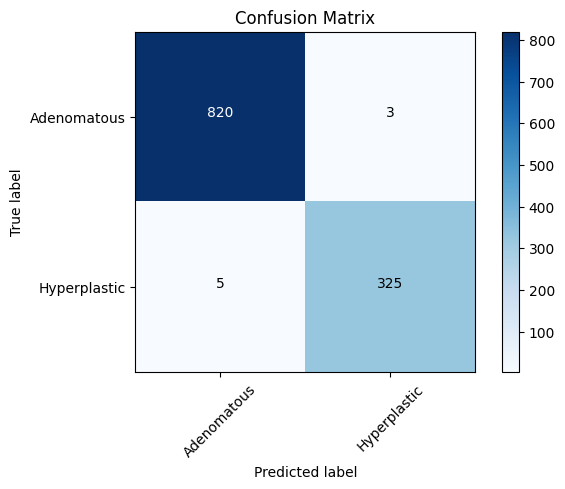

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(confusion_matrix, classes):
    confusion_matrix = np.array(confusion_matrix)  # Convert to NumPy array
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = confusion_matrix.max() / 2
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Assuming you have the confusion matrix and class labels
confusion_matrix = [[820, 3],
                    [5, 325]]

class_labels = ['Adenomatous', 'Hyperplastic']

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix, class_labels)
plt.savefig('my_plot.pdf', format='pdf', bbox_inches='tight', pad_inches=0.1, dpi=300)